In [1]:
import time, json, hashlib, sqlite3

conn = sqlite3.connect('blockchainmed.db')
c = conn.cursor()
c.close()

In [14]:


class Blockchain():
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.temp_data = []
    
    def create_genesis_block(self):
        return {"index":0,
                'timestamp': time.time(),
                'data': None,
                'prev_hash': None} 
        
    def new_data(self, patient, medication, qty, refill):
        data = {'patient':patient,
                'medication': medication,
                'qty': qty,
                'refill': refill}
        
        self.temp_data.append(data)
        
    def add_block(self, proof_of_work):
        block = {'index':len(self.chain) + 1,
                 'timestamp': time.time(),
                 'data': self.temp_data,
                 'prev_hash': self.hash_code(self.chain[-1]),
        }
        self.temp_data = []
        self.chain.append(block)
        return block
    
    def hash_code (self, block):
        str_obj = json.dumps(block, sort_keys=True)
        str = str_obj.encode()
        hash_number = hashlib.sha256(str)
        hexadeimal_hash = hash_number.hexdigest()
        return hexadeimal_hash
    
block_chain = Blockchain()    

In [15]:


def create_patientTable():
    	c.execute('CREATE TABLE IF NOT EXISTS patienttable(patientID TEXT, medication TEXT, qty TEXT, refill TEXT)')
     

def add_patientdata(patientID,medication,qty,refill):
	c.execute('INSERT INTO patienttable(patientID,medication,qty,refill) VALUES (?,?,?,?)',
           (patientID,medication,qty,refill))
	conn.commit()


In [16]:
 
create_patientTable()


In [17]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [18]:
qualitydf = pd.read_csv('quality.csv')

qualitydf.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [19]:

quad_df = qualitydf[['MemberID', 'Narcotics', 'DaysSinceLastERVisit', 'MedicalClaims']]
quad_df[:5]

,MemberID,Narcotics,DaysSinceLastERVisit,MedicalClaims
0,1,1,731.0,93
1,2,1,411.0,19
2,3,3,731.0,27
3,4,0,158.0,59
4,5,3,449.0,51


In [20]:
d000 = block_chain.new_data('Sam', 'medication name', 1, 3)
d001 = block_chain.new_data('Tom', 'medication name', 2, 3)
d002 = block_chain.new_data('Jeff', 'medication name', 10, 3)
block_chain.add_block(111189)
d003 = block_chain.new_data('Jon', 'medication name', 1, 10)
d004 = block_chain.new_data('Hank', 'medication name', 2, 5)
d005 = block_chain.new_data('James', 'medication name', 10, 9)
block_chain.add_block(151199)


{'index': 3,
 'timestamp': 1671832760.0338311,
 'data': [{'patient': 'Jon',
   'medication': 'medication name',
   'qty': 1,
   'refill': 10},
  {'patient': 'Hank', 'medication': 'medication name', 'qty': 2, 'refill': 5},
  {'patient': 'James',
   'medication': 'medication name',
   'qty': 10,
   'refill': 9}],
 'prev_hash': 'cc33e21a74a59bc6e646bb881b4a2b21ea6b3b3f74a25d911ba2a084f945ba9c'}

In [22]:

ret = block_chain.chain[1].get('data')
patient = ret[0]['patient']
meds = ret[0]['medication']
qtys = ret[0]['qty']
refills = ret[0]['refill']
add_patientdata(patient, meds, qtys,refills)


In [81]:
quad_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MemberID,131.0,66.000000,37.960506,1.0,33.5,66.0,98.5,131.0
Narcotics,131.0,4.572519,9.713615,0.0,0.0,1.0,3.0,59.0
Pain,131.0,15.557252,20.418001,0.0,1.0,8.0,23.0,104.0
MedicalClaims,131.0,43.244275,28.886540,11.0,25.5,37.0,49.5,194.0


<AxesSubplot:xlabel='Pain', ylabel='Narcotics'>

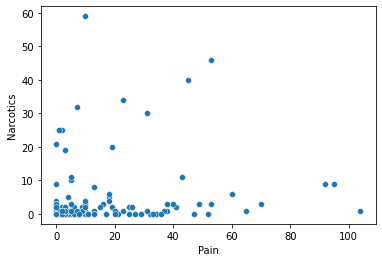

In [82]:
sns.scatterplot(qualitydf, x='Pain', y='Narcotics')
